# Final Project: Correlations Between Political Factors and Economic Prosperity

## Introduction and Overview

In this project we will use a variety of data clustering and probability analytics on data related to economic prosperity and political influences. The data comes from [Human Progress](https://humanprogress.org/dws), a project by the [Cato Institute](https://www.cato.org/) that explains how much the world has progressed through comprehensive datasets; and from [The World Bank](www.worldbank.org), one of the world's largest source of funding and data for developing countries. The data clustering and probability analytical codes can be found [here](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/EMSE6992_Assignments/HW3.ipynb).

The economic prosperity we will look at are Gross Domestic Product (GDP) per person and Gross Domestic Income (GDI) per person in 2011 International Dollars, and Income Classification. [Income Classification](https://blogs.worldbank.org/opendata/new-country-classifications-2016) is The World Bank's analytical classification of world economies based on GDI. An [International Dollar](https://knoema.com/atlas/ranks/GDP-per-capita-based-on-PPP) is a hypothetical currency that has the same purchasing power as a dollar in the United States based on Purchasing Power Parity (PPP).

### Part 1: Import Libraries and ETL

In [182]:
#Import required libraries
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from pandas import DataFrame as df

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [186]:
#Read in and combine GDP-related data files

GDP_PP = df(pd.read_csv("GDP Datasets\GDP Per Person, 2011 Internal Dollars, PPP, 1990-2016.csv"))
GNI_PP = df(pd.read_csv("GDP Datasets\GNI Per Capita 02.csv"))

GDP_Total = df(pd.merge(GDP_PP, GNI_PP, how='inner', on=['Country', 'Year']))

#Read in factors data files

Table01 = df(pd.read_csv("Factors Datasets\Democracy vs Autocracy Over Time.csv"))
Table02 = df(pd.read_csv("Factors Datasets\Doing Business, Enforcing Contracts, Overall Score.csv"))
Table03 = df(pd.read_csv("Factors Datasets\Economic Freedom, Access to Sound Money.csv"))
Table04 = df(pd.read_csv("Factors Datasets\Economic Freedom, Freedom to Trade Internationally.csv"))
Table05 = df(pd.read_csv("Factors Datasets\Economic Freedom, Legal Structure and Security of Property Rights.csv"))
Table06 = df(pd.read_csv("Factors Datasets\Economic Freedom, Regulation of Credit, Labor, and Business.csv"))
Table07 = df(pd.read_csv("Factors Datasets\Economic Freedom, Scale 0 - 10.csv"))
Table08 = df(pd.read_csv("Factors Datasets\Economic Freedom, Size of Government.csv"))
Table09 = df(pd.read_csv("Factors Datasets\Effect of Taxation on Incentives to Invest.csv"))
Table10 = df(pd.read_csv("Factors Datasets\Start a Business Days.csv"))
Table11 = df(pd.read_csv("Factors Datasets\Start a Business Procedures.csv"))
Table12 = df(pd.read_csv("Factors Datasets\Prevalence of Trade Barriers.csv"))
Table13 = df(pd.read_csv("Factors Datasets\Total Tax Rate.csv"))
Table14 = df(pd.read_csv("Factors Datasets\Trade Tariffs.csv"))

GDP_Total.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,Year,GDP Per Person,GDI Per Capita,Income Classification
0,Afghanistan,2002,1063.64,1061.37,Lower Middle
1,Afghanistan,2003,1099.19,1097.60,Lower Middle
2,Afghanistan,2004,1062.25,1063.82,Lower Middle
3,Afghanistan,2005,1136.12,1138.10,Lower Middle
4,Afghanistan,2006,1161.12,1167.88,Lower Middle


Note that the Democracy vs Autocracy Over Time dataset goes back to 1800, but all other datasets go back to 1970s at the earliest. This means that for years 1800 - 1970, all columns (besides Democracy vs Autocracy score) will have 'NaN' entries, which provide no information and will complicate our data analysis code. Therefore, we will use a subset of the Democracy vs Autocracy Over Time dataset that goes back to 1970s.

In [187]:
Table01 = df.reset_index(Table01[Table01["Year"] > 1970])
Table01.head()

,index,Country,Year,Democracy vs Autocracy Score
0,171,Afghanistan,1971,-7
1,172,Afghanistan,1972,-7
2,173,Afghanistan,1973,-7
3,174,Afghanistan,1974,-7
4,175,Afghanistan,1975,-7


In [188]:
#Combine factors datasets

def MergeTables():
    tables = (Table02, Table03, Table04, Table05, Table06, Table07, Table08, Table09, Table10, Table11, Table12, Table13, Table14)
    Factors = Table01
    for i in range(12):
            Factors = df(pd.merge(Factors, tables[i], how='inner', on=['Country', 'Year']))
    Factors = df(Factors)
    return Factors
Factors = df(MergeTables())
Factors.head(10)

,index,Country,Year,Democracy vs Autocracy Score,Enforcing Contracts Overall Score,Access to Sound Money Score,Freedom to Trade Internationally Score,Legal Structure and Security of Property Rights Score,"Regulation of Credit, Labor, and Business Score",Economic Freedom Score,Size of Government Score,Effect of Taxation on Incentives to Invest,Number of Days to Start a Business,Number of Procedures to Start a Business,Prevalence of Trade Barriers Score,Total Tax Rate
0,293,Albania,2013,9,58.89,9.69,7.71,4.54,6.62,7.27,7.80,3.736204,4.0,4.0,4.068446,38.7
1,294,Albania,2014,9,56.84,9.63,8.23,4.67,6.95,7.48,7.90,3.557951,4.5,5.0,3.674663,31.7
2,295,Albania,2015,9,53.66,9.59,8.11,5.00,7.04,7.53,7.92,3.203822,4.5,5.0,3.816012,30.7
3,296,Albania,2016,9,53.66,9.55,8.21,5.07,6.91,7.54,7.94,2.759165,5.5,6.0,4.263414,36.5
4,348,Algeria,2013,2,52.89,7.17,4.90,4.34,5.41,5.04,3.40,3.643963,25.0,14.0,3.430355,72.0
5,349,Algeria,2014,2,52.89,7.20,4.66,4.35,5.38,5.01,3.46,3.540837,25.0,14.0,3.706969,71.9
6,350,Algeria,2015,2,55.49,6.85,4.01,4.55,5.26,4.83,3.48,3.357684,22.0,13.0,3.541834,72.7
7,351,Algeria,2016,2,55.49,7.25,4.13,4.69,5.27,4.99,3.62,3.352651,20.0,12.0,3.572433,72.7
8,390,Angola,2013,-2,25.22,6.73,5.95,2.99,5.31,5.25,5.27,3.942857,68.0,8.0,3.735294,53.2
9,391,Angola,2014,-2,25.22,6.79,5.11,2.99,5.36,5.13,5.40,3.527077,66.0,8.0,2.879643,52.1


Note that some rows have NaN values in many columns. As with the Democracy vs Autocracy dataset, these rows will provide little to no information during our analysis and will complicate our data analysis code. Therefore, we will drop rows that have NaN in six or more columns, since we have 13 factors not including columns related to GDP.

In [189]:
#Combine GDP and Factors datasets
#Drop NaN values

Dataset = df(pd.merge(GDP_Total, Factors, how='inner', on=['Country', 'Year']))
Dataset = df(Dataset.dropna(thresh=6))
Dataset = df(Dataset.drop(columns = 'index'))
Dataset.tail()

,Country,Year,GDP Per Person,GDI Per Capita,Income Classification,Democracy vs Autocracy Score,Enforcing Contracts Overall Score,Access to Sound Money Score,Freedom to Trade Internationally Score,Legal Structure and Security of Property Rights Score,"Regulation of Credit, Labor, and Business Score",Economic Freedom Score,Size of Government Score,Effect of Taxation on Incentives to Invest,Number of Days to Start a Business,Number of Procedures to Start a Business,Prevalence of Trade Barriers Score,Total Tax Rate
434,Vietnam,2016,5955.26,5589.40,Upper Middle,-7,60.22,6.47,6.28,5.06,6.70,6.42,7.61,3.565612,20.0,10.0,3.933878,39.4
435,Zimbabwe,2013,1901.18,1695.60,Lower Middle,4,41.03,6.90,5.59,3.58,3.84,5.30,6.62,3.611909,90.0,9.0,4.839155,35.8
436,Zimbabwe,2014,1908.48,1700.87,Lower Middle,4,43.25,7.97,5.91,3.62,3.94,5.63,6.74,3.529561,90.0,9.0,4.890493,35.3
437,Zimbabwe,2015,1890.78,1678.14,Lower Middle,4,38.73,8.18,5.68,3.82,5.45,6.01,6.90,3.153250,90.0,9.0,4.539993,32.8
438,Zimbabwe,2016,1859.94,1677.42,Lower Middle,4,38.73,8.30,5.56,3.75,6.55,6.06,6.15,2.997059,90.0,9.0,4.379714,32.8


### Part 2: Correlation Visualization

#### 1: Correlation Matrix

Code: [A Quick Start Guide to Compute Correlation Matrix in Python using NSEpy & Pandas](https://www.marketcalls.in/python/quick-start-guide-compute-correlation-matrix-using-nsepy-pandas-python.html)

Populating the interactive namespace from numpy and matplotlib


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'xlabel']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


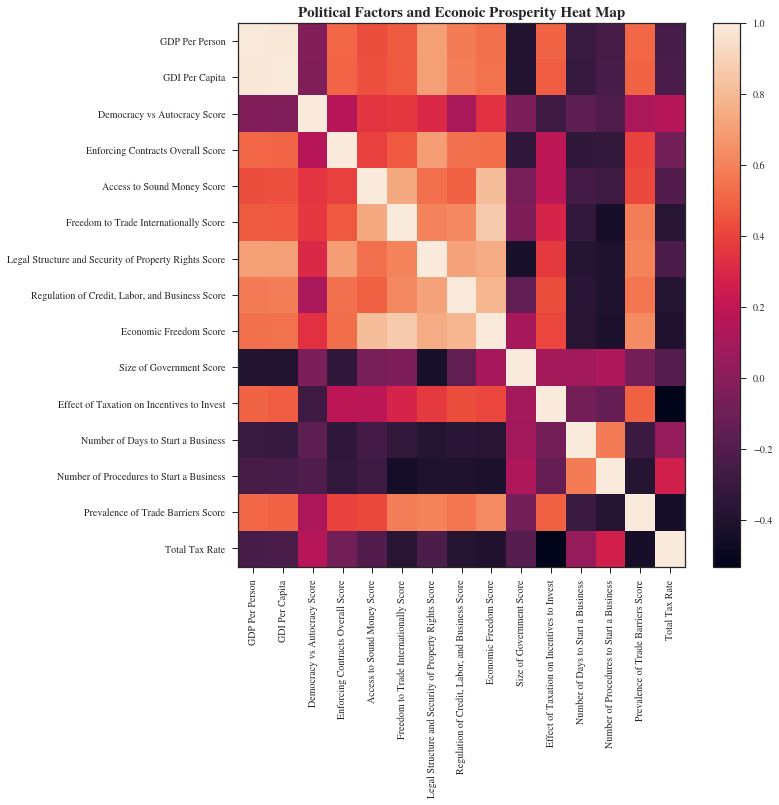

In [190]:
import matplotlib.pyplot as plt

corr = df.corr(Dataset)

%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.title('Political Factors and Econoic Prosperity Heat Map', fontsize=15, fontweight='bold')
plt.show()

Looking at the correlation matrix, we can see which politocal factors have a stronger correlation with our economic prosperity indicators. Since we have so many factors, we'll create a second correlation matrix focusing on political factors that have a correlation coeficient of 0.5 or greater with economic prosperity indicators.

In [191]:
Dataset.corr()

,GDP Per Person,GDI Per Capita,Democracy vs Autocracy Score,Enforcing Contracts Overall Score,Access to Sound Money Score,Freedom to Trade Internationally Score,Legal Structure and Security of Property Rights Score,"Regulation of Credit, Labor, and Business Score",Economic Freedom Score,Size of Government Score,Effect of Taxation on Incentives to Invest,Number of Days to Start a Business,Number of Procedures to Start a Business,Prevalence of Trade Barriers Score,Total Tax Rate
GDP Per Person,1.000000,0.987738,-0.023558,0.509986,0.435796,0.475191,0.701390,0.575498,0.543092,-0.389488,0.502661,-0.298887,-0.244760,0.512576,-0.242208
GDI Per Capita,0.987738,1.000000,-0.032364,0.508456,0.442538,0.472417,0.703533,0.583733,0.546702,-0.391245,0.483557,-0.307408,-0.243708,0.501408,-0.230271
Democracy vs Autocracy Score,-0.023558,-0.032364,1.000000,0.157419,0.356366,0.362541,0.306485,0.111235,0.336968,-0.051089,-0.275904,-0.159393,-0.218636,0.117612,0.157180
Enforcing Contracts Overall Score,0.509986,0.508456,0.157419,1.000000,0.391860,0.469838,0.696259,0.540877,0.537387,-0.330177,0.186151,-0.338198,-0.325132,0.400925,-0.078193
Access to Sound Money Score,0.435796,0.442538,0.356366,0.391860,1.000000,0.741472,0.545196,0.491865,0.819321,-0.061668,0.174381,-0.250761,-0.284749,0.417160,-0.197867
Freedom to Trade Internationally Score,0.475191,0.472417,0.362541,0.469838,0.741472,1.000000,0.602107,0.627308,0.865190,-0.046106,0.285408,-0.324140,-0.441782,0.586695,-0.366112
Legal Structure and Security of Property Rights Score,0.701390,0.703533,0.306485,0.696259,0.545196,0.602107,1.000000,0.716524,0.749874,-0.424199,0.367504,-0.379908,-0.404205,0.604964,-0.223742
"Regulation of Credit, Labor, and Business Score",0.575498,0.583733,0.111235,0.540877,0.491865,0.627308,0.716524,1.000000,0.788600,-0.143346,0.435235,-0.359702,-0.405618,0.562704,-0.376493
Economic Freedom Score,0.543092,0.546702,0.336968,0.537387,0.819321,0.865190,0.749874,0.788600,1.000000,0.102362,0.408574,-0.370180,-0.416437,0.629934,-0.399684
Size of Government Score,-0.389488,-0.391245,-0.051089,-0.330177,-0.061668,-0.046106,-0.424199,-0.143346,0.102362,1.000000,0.094115,0.084100,0.130753,-0.076968,-0.192783


#### 2: SPLOM

Code: [Bayesian Statistics and Linear Regression](https://github.com/madly9/madly9.github.io/blob/master/Assignments/HW2.ipynb)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


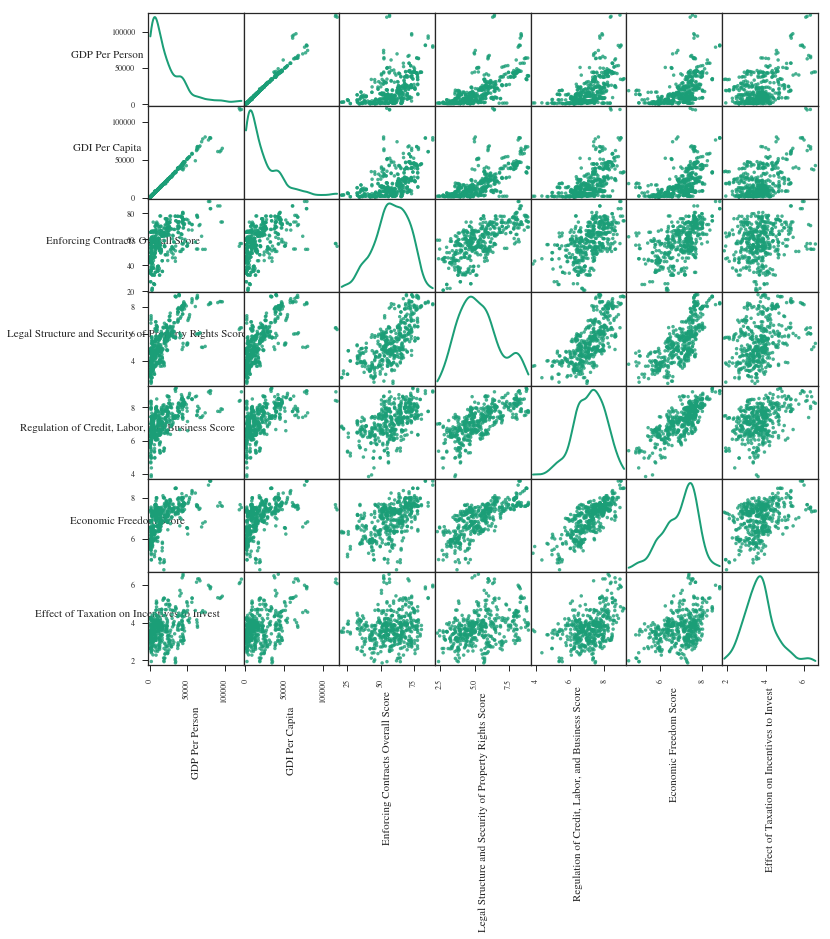

In [202]:
from pandas.tools.plotting import scatter_matrix

Smaller_Dataset = Dataset[['GDP Per Person', 'GDI Per Capita', 'Income Classification',
                           'Enforcing Contracts Overall Score', 
                           'Legal Structure and Security of Property Rights Score',
                           'Regulation of Credit, Labor, and Business Score', 'Economic Freedom Score', 
                           'Effect of Taxation on Incentives to Invest']]
axeslist=scatter_matrix(Smaller_Dataset, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)

### Part 3: Linear Regression (Exploratory)

Code: [Linear Regression, kNN models](https://github.com/madly9/madly9.github.io/blob/master/Assignments/HW2.ipynb)

#### Step 1: Standarization and Training/Testing Split

Note: Since we're doing a simple (rather than multi) linear regression model, we can only focus on one target variable and one factor . Since GDP Per Person is a commonly used economic measure, we'll use GDP Per Person rather than GDI Per Person. Looking at the SPLOM matrix, Legal Structure and Security of Property Rights Score seems to have the most linear relationship with GDP Per Person (besides GDI Per Person), so we'll look at Legal Structure and Security of Property Rights Score.

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

GDP_Dataset = Smaller_Dataset.drop(['GDI Per Capita', 'Income Classification'], axis=1)
GDP_Dataset = df(GDP_Dataset)

X_HD=GDP_Dataset.values
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
GDPPP_coll_std_vec=X_HDn[:,0]
GDPPP_coll_std=GDPPP_coll_std_vec.reshape(-1,1)
LegalStructure_std_vec=X_HDn[:,2]
LegalStructure_std=LegalStructure_std_vec.reshape(-1,1)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(LegalStructure_std, GDPPP_coll_std_vec)

#### Step 2: Training and Plotting

In [219]:
#Training

clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print(clf1.coef_, clf1.intercept_)

[0.69484944] 0.006647760960641601


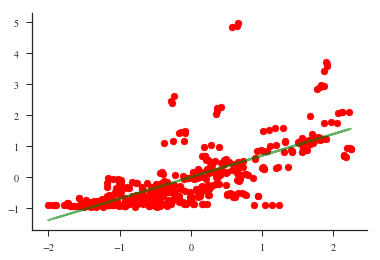

In [220]:
#Plot the scatter against the fit for both training and test data

plt.scatter(LegalStructure_std_vec, GDPPP_coll_std_vec,c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='g', alpha=0.2)

mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
remove_border()
plt.show()

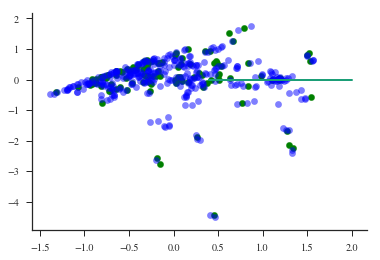

In [221]:
#Look at the residuals, again on both sets.

plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
remove_border()
plt.plot([0.4,2],[0,0])

[0.63616216 0.14505536]


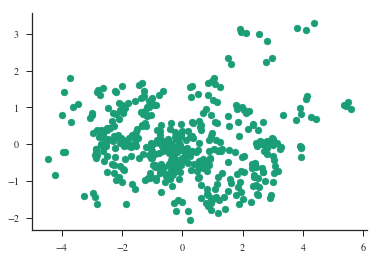

In [222]:
#Take the standarddized data and do a 2-D PCA on it. 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_HDn)
print(pca.explained_variance_ratio_)

remove_border()
plt.scatter(X[:, 0], X[:, 1])

#### Step 3: Reconstruction

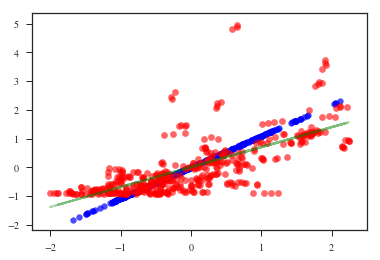

In [223]:
#Reconstruct the original data from only the first component, setting the others to 0.

pca1 = PCA(n_components=1)
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)

#Plot the reconstructed data from the first principal component, in blue

plt.scatter(X_reconstructed[:,1], X_reconstructed[:,0],c='b', s=35, alpha=0.7)
plt.scatter(LegalStructure_std_vec, GDPPP_coll_std_vec, s=40, c='r', alpha=0.6)
plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='g', alpha=0.3)

### Part 4: Linear Regression (Modeling)

Now that we've explored the relationship between GDI Per Person and Legal Structure and Security of Property Rights Score, we can focus on linear regression modeling. Be

Code: [Linear Regression, kNN models](https://github.com/madly9/madly9.github.io/blob/master/Assignments/HW2.ipynb)

#### Step 1: Load and Plot Array

Note: Given the difference in scale between GDI Per Person and Legal Structure and Security of Property Rights Score, we'll use the standarized data arrays we created in Part 3.

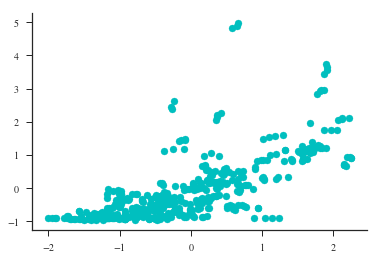

In [224]:
GDP_PP = GDPPP_coll_std_vec
Legal_Structure = LegalStructure_std_vec

plt.scatter(Legal_Structure, GDP_PP, color = 'c')
axes = plt.gca()
axes.grid(False)
remove_border(axes)

#### Step 2: Run Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression

reg = 1000.
clf4 = LogisticRegression(C=reg)
clf4.fit(Legal_Structure.reshape(-1,1), GDP_PP.astype('int'))

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Step 3: Make Predictions, Probabilities, and Plotting

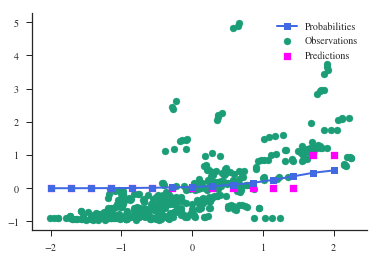

In [230]:
Legal_Structure_new=np.linspace(-2., 2., 15)
probs = clf4.predict_proba(Legal_Structure_new.reshape(-1,1))[:, 1]
predicts = clf4.predict(Legal_Structure_new.reshape(-1,1))

plt.scatter(Legal_Structure, GDP_PP, label='Observations')
axes = plt.gca()
axes.grid(False)
remove_border(axes)
plt.plot(Legal_Structure_new, probs, marker ='s', color = "royalblue", label='Probabilities')
plt.scatter(Legal_Structure_new, predicts, marker='s', color="magenta", label="Predictions")
plt.legend(loc= "upper right")

#### Step 4: Predictions vs Failures

In [233]:
#pd.crosstab(GDP_PP, clf4.predict(Legal_Structure_new.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])
results = pd.DataFrame(clf.cv_results) # clf is the GridSearchCV object
print(results.head()) 

AttributeError: 'function' object has no attribute 'cv_results'

### Part 5: Bias, Variance, and Cross Validation

Code: [Linear Regression, kNN Models](https://github.com/madly9/madly9.github.io/blob/master/Assignments/HW2.ipynb)

#### Step 1: Load Required Settings

In [234]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [235]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

#### Step 3: Clustering

Note: Since we'll cluster according to Income Classification, we'll use the "Smaller_Dataset" dataframe rather than "GDP_Dataset" dataframe.

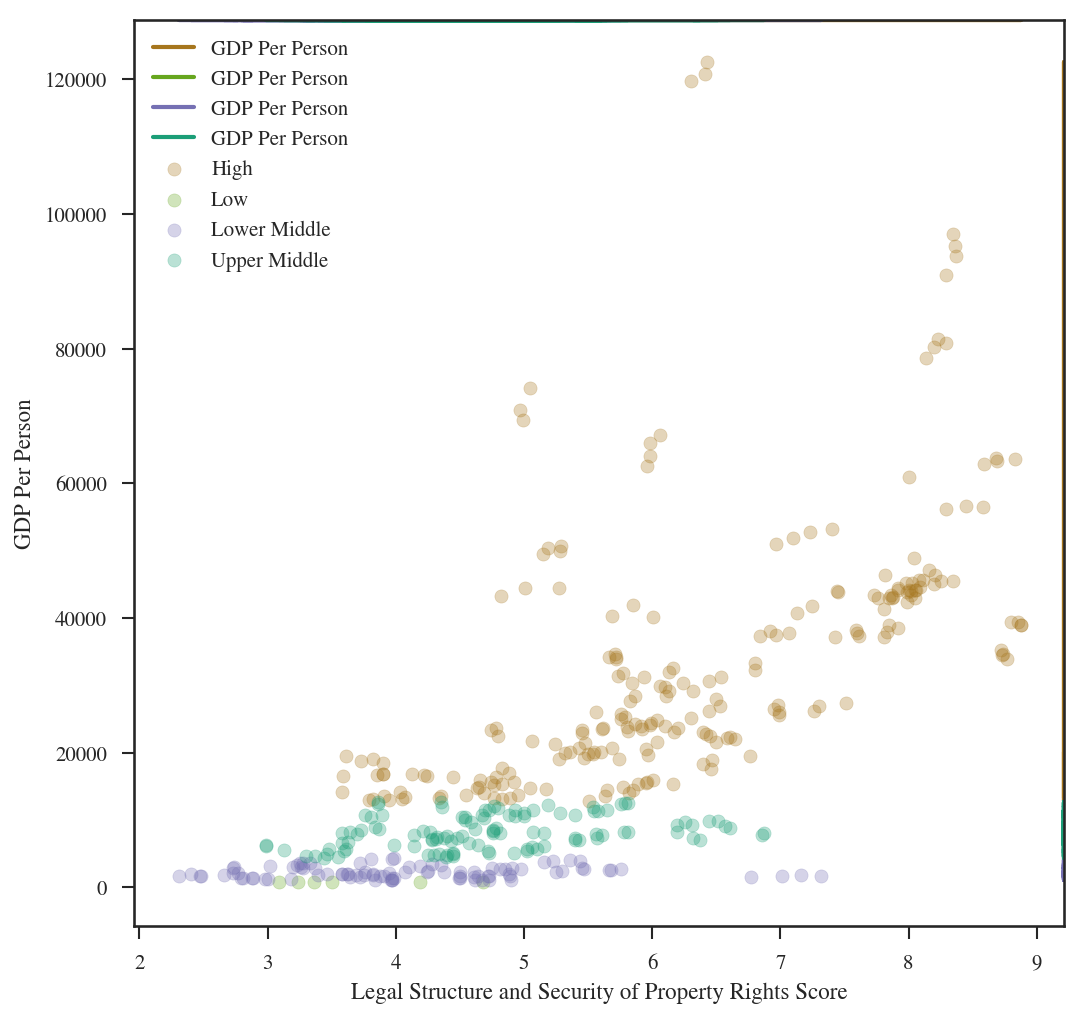

In [255]:
akeys = [1,2,3,4]
avals = ['Regulation of Credit, Labor, and Business Score', 'Economic Freedom Score', 
         'Enforcing Contracts Overall Score']
amap={e[0]:e[1] for e in zip(akeys,avals)}

ax=scatter_by(Smaller_Dataset, 'Legal Structure and Security of Property Rights Score', 'GDP Per Person', 
              by='Income Classification', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper left');

#### Step 4: Add Plotting Settings

In [242]:


#Instructin6: Add plotting settings
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE"), clf.score(Xte, yte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

#### Step 5: kNN with 20 Neighbors

SCORE


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


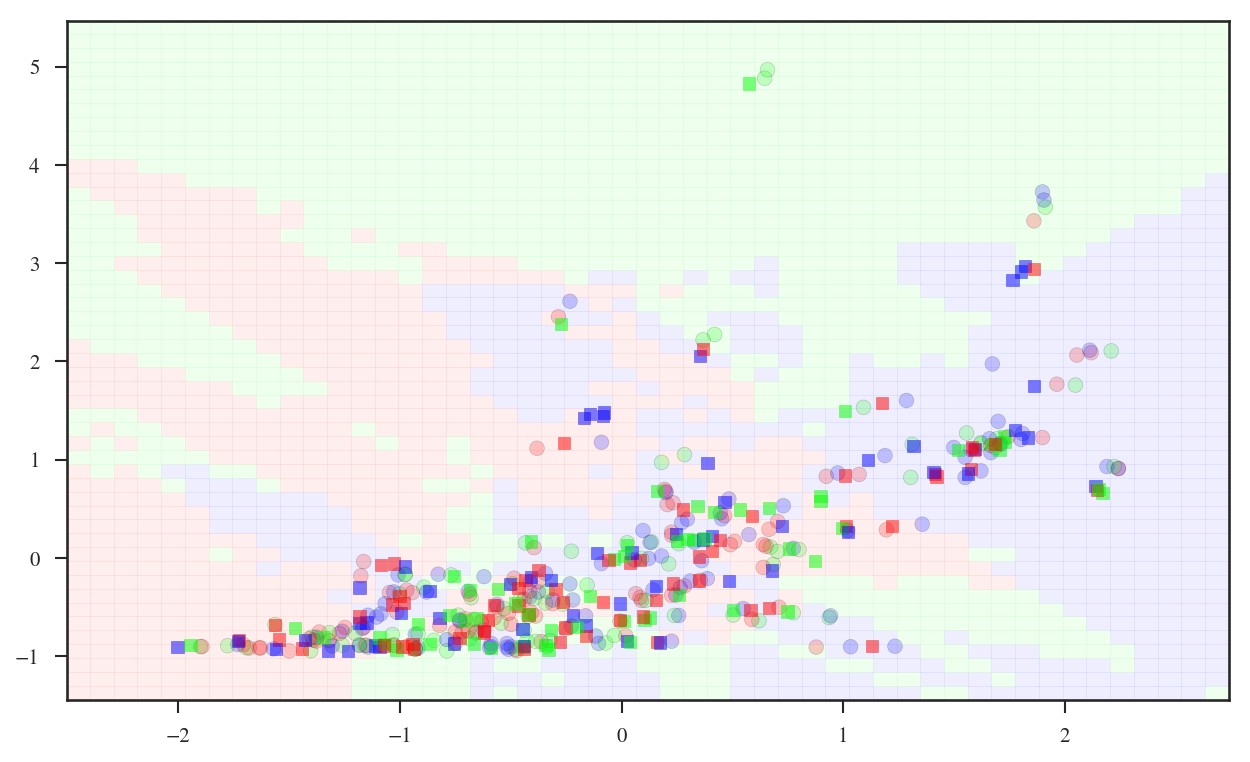

In [246]:
from sklearn.neighbors import KNeighborsClassifier

subdf = GDP_Dataset[['Legal Structure and Security of Property Rights Score', 'GDP Per Person']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y=GDP_Dataset['randNumCol'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr=np.concatenate((Xtrain, Xtest))

clf = KNeighborsClassifier(20).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)